In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



project_path = "/content/drive/MyDrive/Colab Notebooks"
selected_path = project_path + "/Data/heart_disease_selected.csv"
results_path = project_path + "/Result/evaluation_metrics.txt"


df = pd.read_csv(selected_path)
target_col = "target"   # adjust if different
X = df.drop(columns=[target_col])
y = df[target_col]

print("Dataset shape:", df.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Dataset shape: (303, 9)


In [2]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1, "AUC": auc}

    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.89      0.89      0.89        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        33
           1       0.74      0.61      0.67        28

    accuracy                           0.72        61
   macro avg       0.72      0.71      0.71        61
weighted avg       0.72      0.72      0.72        61


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        33
           1       0.75      0.75      0.75        28

    accuracy                           0.77        61
   macro avg       0.77      0.77     

In [3]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n")
print(results_df)

# Save results
results_df.to_csv(results_path)
print(f"\nResults saved at: {results_path}")



Model Comparison:

                     Accuracy  Precision    Recall  F1-score       AUC
Logistic Regression  0.901639   0.892857  0.892857  0.892857  0.955628
Decision Tree        0.721311   0.739130  0.607143  0.666667  0.715368
Random Forest        0.770492   0.750000  0.750000  0.750000  0.877706
SVM                  0.852459   0.851852  0.821429  0.836364  0.940476

Results saved at: /content/drive/MyDrive/Colab Notebooks/Result/evaluation_metrics.txt


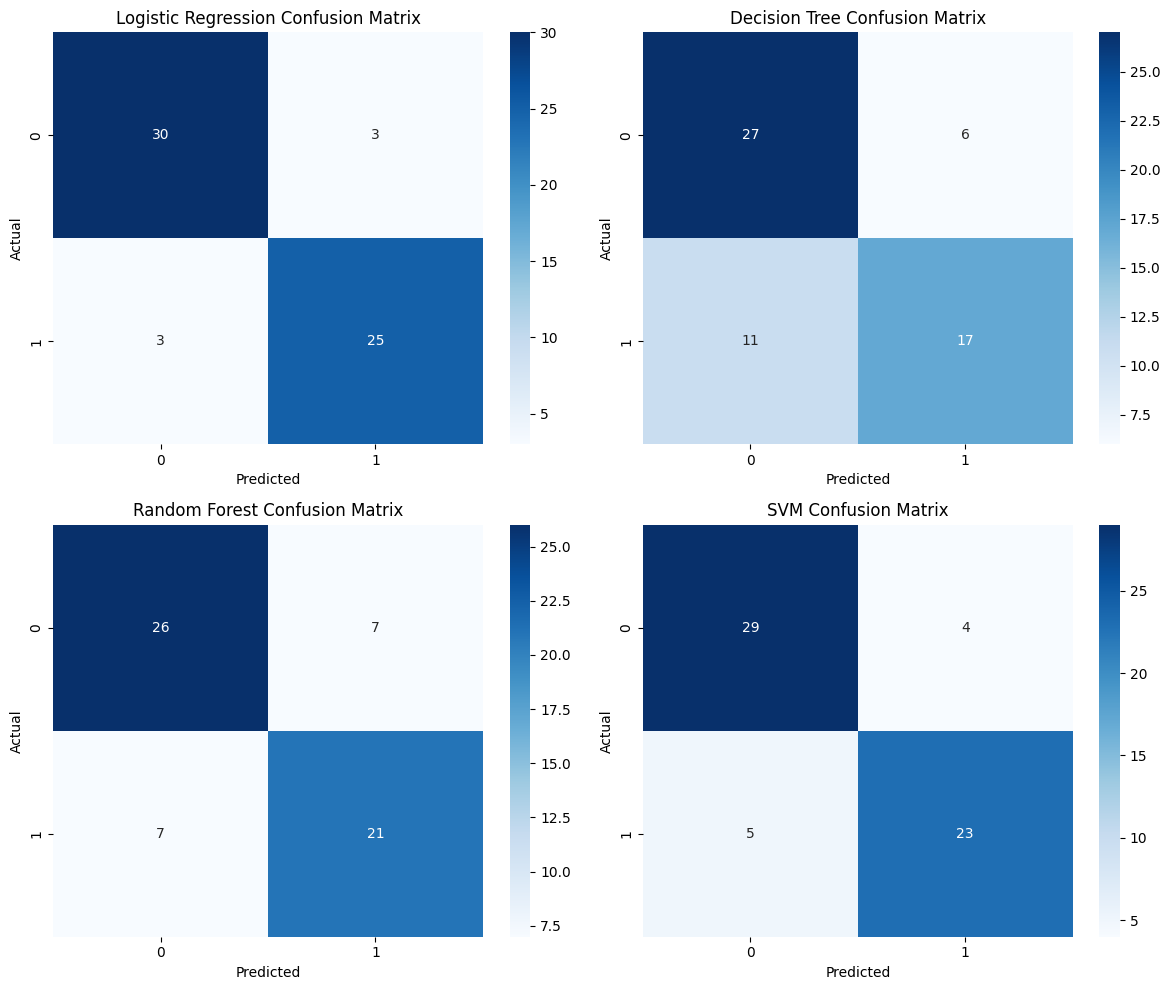

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


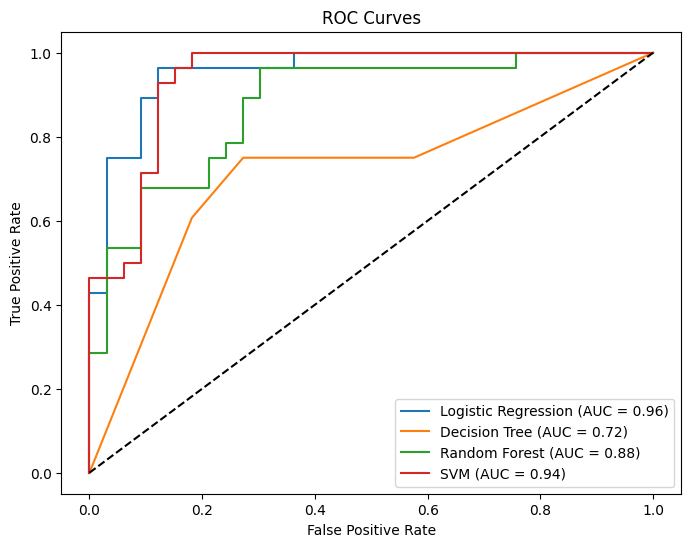

In [6]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1],[0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()
